In [1]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!ls -lah /mnt/lwll/lwll-coral/hrant/embeddings/fair1m/

total 542G
drwxrwxr-x 2 hkhachatrian hkhachatrian   10 Mar 21 23:55 .
drwxrwxr-x 3 hkhachatrian hkhachatrian    1 Mar  2 18:50 ..
-rw-rw-r-- 1 hkhachatrian hkhachatrian 9.0G Mar 18 15:25 f1m_dino_embeds_train.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 115G Mar 21 18:28 f1m_dino_embeds_val.h5
-rw-rw-r-- 1 hkhachatrian hkhachatrian 115G Mar 19 10:28 f1m_dino_embeds_val.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 3.0M Mar 18 15:25 f1m_dino_labels_train.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian  39M Mar 21 18:28 f1m_dino_labels_val.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 153G Mar 21 11:58 f1m_mae_embeds_val.h5
-rw-rw-r-- 1 hkhachatrian hkhachatrian 3.0M Mar 21 09:52 f1m_mae_labels_train.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian  39M Mar 21 11:58 f1m_mae_labels_val.npy
-rw-rw-r-- 1 hkhachatrian hkhachatrian 153G Mar 21 14:29 f1m_sup_vit_embeds_val.h5
-rw-rw-r-- 1 hkhachatrian hkhachatrian  39M Mar 21 14:29 f1m_sup_vit_labels_val.npy


In [5]:
x = np.load('/mnt/lwll/lwll-coral/hrant/embeddings/fair1m/f1m_sup_vit_labels_val.npy', allow_pickle=True).item()

ValueError: can only convert an array of size 1 to a Python scalar

In [2]:
import h5py

In [3]:
MODEL='mae'
hf = h5py.File(f'/mnt/lwll/lwll-coral/hrant/embeddings/fair1m/f1m_{MODEL}_labels_train.h5', 'r')

In [4]:
%%time
embeds = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/embeds.npy', allow_pickle=True)

CPU times: user 21.3 ms, sys: 54.2 s, total: 54.2 s
Wall time: 2min 29s


In [3]:
%%time
labels = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/labels.npy', allow_pickle=True)

CPU times: user 0 ns, sys: 26.1 ms, total: 26.1 ms
Wall time: 439 ms


In [2]:
dino_embeds_train = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_train.npy', allow_pickle=True)

In [3]:
dino_embeds_val = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_val.npy', allow_pickle=True)

In [3]:
dino_labels_train = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_train.npy', allow_pickle=True)
# dino_labels_val = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_val.npy', allow_pickle=True)

In [4]:
dino_embeds_val = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_val_2000.npy')
dino_labels_val = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_val_2000.npy')

In [7]:
dino_embeds_val.shape

(38000, 768)

In [6]:
np.unique(dino_labels_val, return_counts=True)

(array([ 7,  8, 11, 12, 13, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31,
        32, 33], dtype=uint8),
 array([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
        2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000]))

In [9]:
import torch
import numpy as np
x = np.random.randint(100, size=[1000, 768])/100
x = torch.tensor(x)
t = torch.topk(x, k=3)

In [12]:
t.values

tensor([[0.9900, 0.9900, 0.9900],
        [0.9900, 0.9900, 0.9900],
        [0.9900, 0.9900, 0.9900],
        ...,
        [0.9900, 0.9900, 0.9900],
        [0.9900, 0.9900, 0.9900],
        [0.9900, 0.9900, 0.9900]], dtype=torch.float64)

In [14]:
lab = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_train.npy', allow_pickle=True)

In [15]:
lab.shape

(18659200,)

In [ ]:
torch.zeros((4000, 18659200))

In [13]:
t.indices

tensor([[173,  85,   8],
        [240, 225, 185],
        [301, 166, 146],
        ...,
        [354,  42,  53],
        [169,  58,  15],
        [543, 350,  85]])

In [58]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(dino_embeds_train, dino_labels_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
preds = neigh.predict(dino_embeds_val)

In [60]:
dino_embeds_val[::10].shape

(3800, 768)

In [111]:
len(predicted_classes)

76

In [123]:
1 - (x != dino_labels_val[::10]).mean()

0.5068421052631579

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions


from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

print('Calculating PCA components...')
pca = PCA(n_components = 2)
# pca_train = pca.fit_transform(dino_embeds_train)

def knn_comparison(embeds, labels, k):
    x = embeds
    y = labels
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    print('Fitting knn...')
    clf.fit(x, y)
    
    plot_decision_regions(x, y, clf=clf, legend=2)
    
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Knn with K='+ str(k))
    plt.show()
    


Calculating PCA components...


In [48]:
ind1 = np.where(dino_labels_train==8)[0]
ind2 = np.where(dino_labels_train==11)[0]
ind3 = np.where(dino_labels_train==21)[0]
ind4 = np.where(dino_labels_train==23)[0]
ind5 = np.where(dino_labels_train==26)[0]

In [49]:
ind = np.concatenate([ind1, ind2, ind3, ind4, ind5])

In [33]:
ind.shape

(9350242,)

In [36]:
np.unique(dino_labels_train[ind], return_counts=True)

(array([ 8, 11, 21, 23, 26], dtype=uint8),
 array([1016635, 3822901, 2665158,  680522, 1165026]))

In [ ]:
x = pca.fit_transform(dino_embeds_train[ind])

Fitting knn...


/home/hkhachatrian/mae/.venv/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


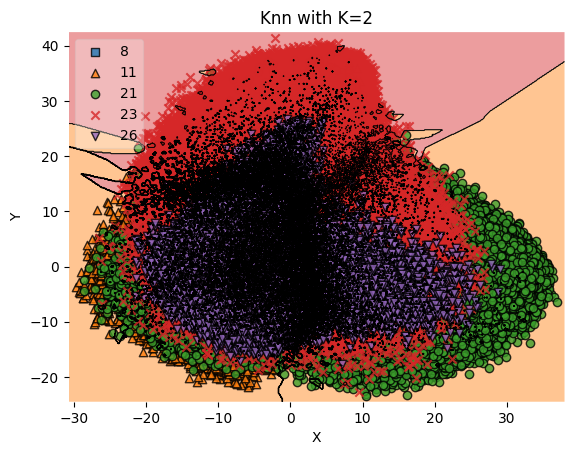

In [41]:
knn_comparison(x, dino_labels_train[ind], 2)

Fitting knn...


/home/hkhachatrian/mae/.venv/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


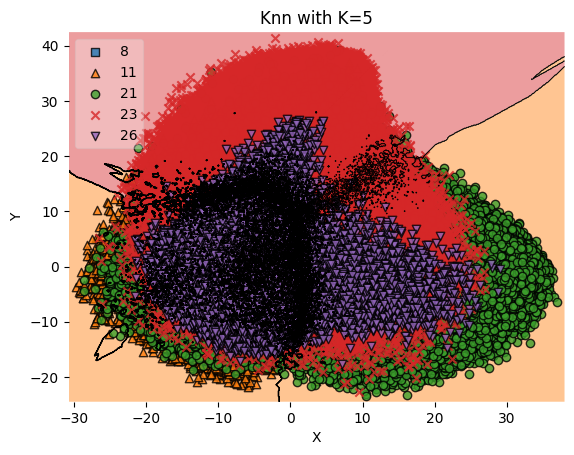

In [42]:
knn_comparison(x, dino_labels_train[ind], 5)

Fitting knn...


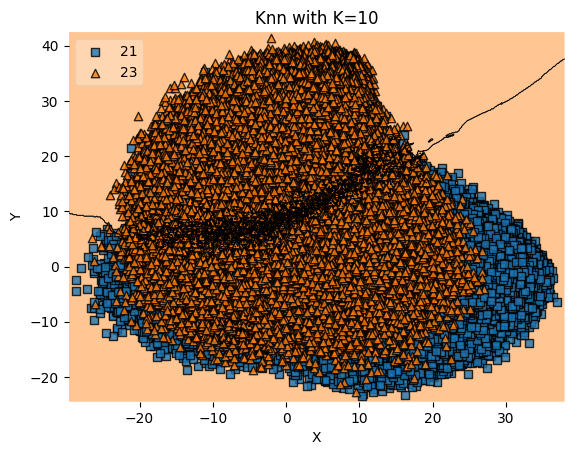

In [57]:
labels = dino_labels_train[ind]
new_ind = np.where(labels == 23)[0]
new_ind_1 = np.where(labels == 21)[0]
new_ind = np.concatenate([new_ind, new_ind_1], axis=0)
knn_comparison(x[new_ind], labels[new_ind], 10)

Fitting knn...


/home/hkhachatrian/mae/.venv/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


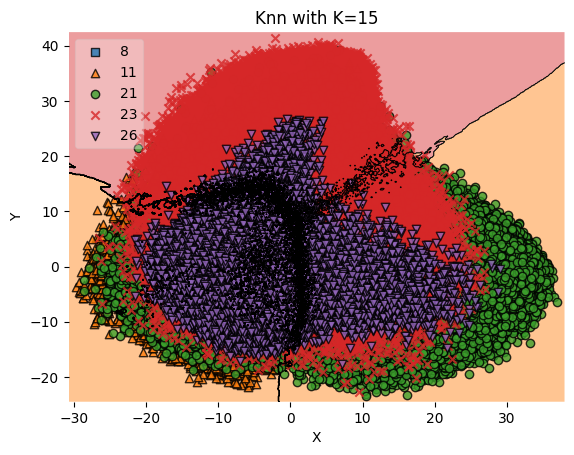

In [44]:
knn_comparison(x, dino_labels_train[ind], 15)

Fitting knn...


/home/hkhachatrian/mae/.venv/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


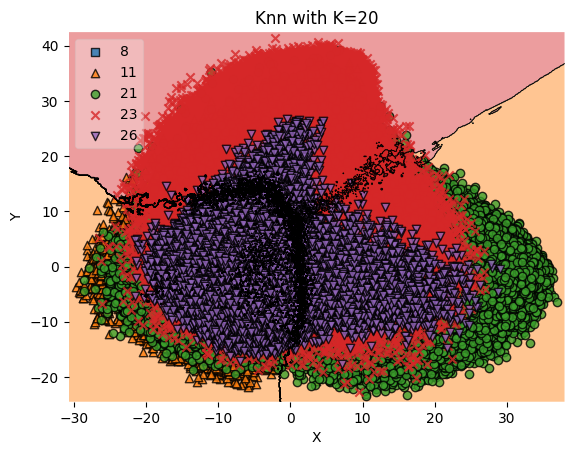

In [45]:
knn_comparison(x, dino_labels_train[ind], 20)

Fitting knn...


/home/hkhachatrian/mae/.venv/lib/python3.10/site-packages/mlxtend/plotting/decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


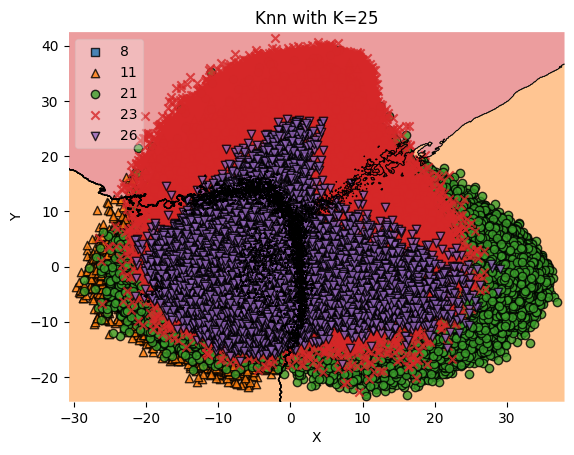

In [46]:
knn_comparison(x, dino_labels_train[ind], 25)

In [4]:
ind = np.where(labels!=1)[0]
np.random.shuffle(ind)
ind

array([ 2218118,  2968055,  6061087, ...,  5910689,  8897924, 12767269])

In [5]:
np.where(labels!=1)

(array([       0,        1,        2, ..., 18659171, 18659185, 18659199]),)

In [6]:
labels[ind[:]]

array([ 7,  2, 22, ..., 11,  8, 11], dtype=uint8)

In [52]:
embeds[ind[:10]]

array([[ 1.0273596 ,  0.18904488,  0.08864026, ..., -0.5136674 ,
        -0.79489726, -0.27093995],
       [-1.1687177 ,  1.6878926 ,  0.38203278, ..., -0.07216516,
        -0.03339314, -0.60794836],
       [-2.6635034 , -1.8016117 , -0.14493838, ..., -0.60545456,
        -0.18466471, -1.6102837 ],
       ...,
       [ 0.04511012,  2.302956  ,  1.191586  , ..., -0.68037605,
         0.01325229, -0.45882052],
       [-2.8471124 , -1.4766209 ,  0.33841333, ...,  0.12034582,
         0.10342021, -0.55455816],
       [-1.7863728 , -2.565501  ,  0.62853533, ...,  0.26222888,
         0.05222931, -0.26230478]], dtype=float32)

In [7]:
ind

array([ 2218118,  2968055,  6061087, ...,  5910689,  8897924, 12767269])

In [6]:
labels.shape, embeds.shape

((18659200,), (18659200, 1024))

In [33]:
2975*32*196

18659200

In [7]:
18_659_200

18659200

In [8]:
uniques, counts = np.unique(labels, return_counts=True)

In [9]:
counts_dct = {uniques[i]:counts[i] for i in range(len(uniques))}

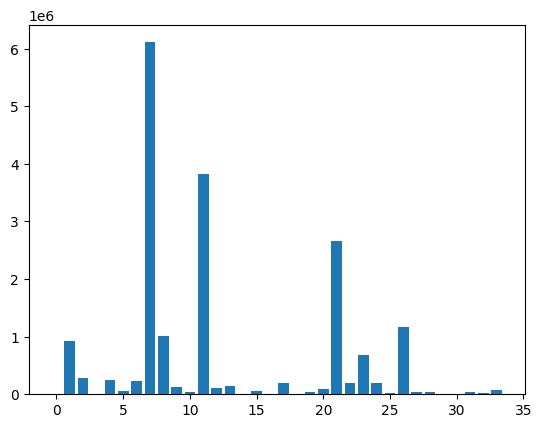

In [10]:
# plt.ylim([0, 2e5])
plt.bar(uniques, counts);

In [84]:
import json

names = ['person', 'motorcycle', 'truck', 'sky', 'wall']

for name in names:
    with open(f'{name}_100_eval_by_ckpts.json') as f:
        file = json.load(f)
#         print(f'{name}\t{}')
#         for key in file.keys():
        print(name, *[round(file[key], 4) for key in file.keys()], sep='\t')

person	0.8115	0.8762	0.8887	0.8967	0.9074	0.9134	0.9173
motorcycle	0.8438	0.887	0.8974	0.8996	0.903	0.903	0.9047
truck	0.6637	0.7039	0.7161	0.7258	0.7374	0.7449	0.7511
sky	0.9006	0.929	0.9354	0.94	0.9459	0.9495	0.9519
wall	0.5699	0.5946	0.6077	0.6585	0.668	0.6786	0.6834


In [11]:
with open('preprocessing/labels.txt') as f:
    labels = {
        int(line[22:25].strip()):
        (line[:22].strip().replace("'", ""), 
         int(line[25:].strip()))
        for line in f.readlines()
    }

eval_labels = [i for i in labels if 0 <= labels[i][1] < 255]

eval_label_names = [labels[i][0] for i in labels if 0 <= labels[i][1] < 255]

In [12]:
plot_counts = [counts_dct[i] for i in eval_labels]

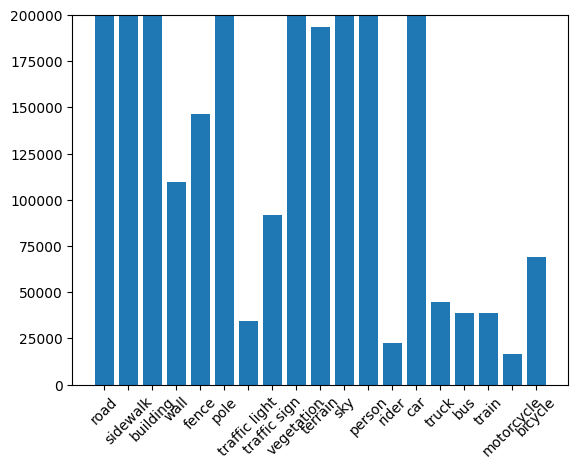

In [13]:
plt.ylim([0, 2e5])
plt.xticks(rotation=45)
plt.bar(eval_label_names, plot_counts);

In [15]:
t = {k:(v, counts_dct[k]) for k, v in zip(eval_labels, eval_label_names)}
t

{7: ('road', 6111042),
 8: ('sidewalk', 1016635),
 11: ('building', 3822901),
 12: ('wall', 109501),
 13: ('fence', 146414),
 17: ('pole', 203783),
 19: ('traffic light', 34697),
 20: ('traffic sign', 91885),
 21: ('vegetation', 2665158),
 22: ('terrain', 193395),
 23: ('sky', 680522),
 24: ('person', 202630),
 25: ('rider', 22368),
 26: ('car', 1165026),
 27: ('truck', 44584),
 28: ('bus', 38923),
 31: ('train', 38767),
 32: ('motorcycle', 16403),
 33: ('bicycle', 69008)}

In [44]:
t2 = {v:(k, counts_dct[k]) for k, v in zip(eval_labels, eval_label_names)}

In [45]:
t2

{'road': (7, 6111042),
 'sidewalk': (8, 1016635),
 'building': (11, 3822901),
 'wall': (12, 109501),
 'fence': (13, 146414),
 'pole': (17, 203783),
 'traffic light': (19, 34697),
 'traffic sign': (20, 91885),
 'vegetation': (21, 2665158),
 'terrain': (22, 193395),
 'sky': (23, 680522),
 'person': (24, 202630),
 'rider': (25, 22368),
 'car': (26, 1165026),
 'truck': (27, 44584),
 'bus': (28, 38923),
 'train': (31, 38767),
 'motorcycle': (32, 16403),
 'bicycle': (33, 69008)}

In [68]:
labels_mae = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/labels_val.npy', allow_pickle=True)
labels_dino = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_val.npy', allow_pickle=True)

In [69]:
(labels_mae != labels_dino).sum()

0

In [38]:
import os

In [65]:
res = []
classes = []
for i in os.listdir('/home/hkhachatrian/mae/checkpoints'):
    if '10000' in i and 'dino' in i and 'no_shuff' not in i:
        res.append(os.path.join(i, 'epoch=299.ckpt'))
#         print(i.split('_'))
        tmp = i.split('_')
        
        name = tmp[1] if len(tmp) == 4 else ' '.join(tmp[1:3])
#         print(name)
        classes.append(t2[name][0])

In [66]:
res

['dino_train_patches_10000/epoch=299.ckpt',
 'dino_road_patches_10000/epoch=299.ckpt',
 'dino_sky_patches_10000/epoch=299.ckpt',
 'dino_person_patches_10000/epoch=299.ckpt',
 'dino_truck_patches_10000/epoch=299.ckpt',
 'dino_wall_patches_10000/epoch=299.ckpt',
 'dino_traffic_sign_patches_10000/epoch=299.ckpt',
 'dino_vegetation_patches_10000/epoch=299.ckpt',
 'dino_pole_patches_10000/epoch=299.ckpt',
 'dino_bicycle_patches_10000/epoch=299.ckpt',
 'dino_sidewalk_patches_10000/epoch=299.ckpt',
 'dino_car_patches_10000/epoch=299.ckpt',
 'dino_rider_patches_10000/epoch=299.ckpt',
 'dino_fence_patches_10000/epoch=299.ckpt',
 'dino_traffic_light_patches_10000/epoch=299.ckpt',
 'dino_terrain_patches_10000/epoch=299.ckpt',
 'dino_building_patches_10000/epoch=299.ckpt',
 'dino_motorcycle_patches_10000/epoch=299.ckpt',
 'dino_bus_patches_10000/epoch=299.ckpt']

In [67]:
classes

[31, 7, 23, 24, 27, 12, 20, 21, 17, 33, 8, 26, 25, 13, 19, 22, 11, 32, 28]

In [48]:
'traffic light_dhb'.split('_')

['traffic light', 'dhb']

In [85]:
with open('./dino_10000_299_eval.json') as f:
    data = json.load(f)

In [86]:
data

{'dino_train_patches_10000/epoch=299.ckpt': [31, 0.8932598829269409],
 'dino_road_patches_10000/epoch=299.ckpt': [7, 0.9410562515258789],
 'dino_sky_patches_10000/epoch=299.ckpt': [23, 0.9840115308761597],
 'dino_person_patches_10000/epoch=299.ckpt': [24, 0.9659325480461121],
 'dino_truck_patches_10000/epoch=299.ckpt': [27, 0.8783265352249146],
 'dino_wall_patches_10000/epoch=299.ckpt': [12, 0.8762566447257996],
 'dino_traffic_sign_patches_10000/epoch=299.ckpt': [20, 0.947857677936554],
 'dino_vegetation_patches_10000/epoch=299.ckpt': [21, 0.960972249507904],
 'dino_pole_patches_10000/epoch=299.ckpt': [17, 0.8277086019515991],
 'dino_bicycle_patches_10000/epoch=299.ckpt': [33, 0.9705884456634521],
 'dino_sidewalk_patches_10000/epoch=299.ckpt': [8, 0.7311201095581055],
 'dino_car_patches_10000/epoch=299.ckpt': [26, 0.9612154960632324],
 'dino_rider_patches_10000/epoch=299.ckpt': [25, 0.9687760472297668],
 'dino_fence_patches_10000/epoch=299.ckpt': [13, 0.8611505627632141],
 'dino_traffi

In [35]:
number = 10000
for cls in [19, 20, 31]:
    sample = f"""CUDA_VISIBLE_DEVICES="2" python binary_classifier.py \\
    --embedings_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_train.npy \\
    --labels_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_train.npy \\
    --embedings_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_val.npy \\
    --labels_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_val.npy \\
    --dataset_name cs --pred_class {cls} --training_number {number} --experiment dino_{t[cls][0]}_patches_{number} \\
    --batch_size 32 --epochs 300"""
    print()
    print(sample)
    print()


CUDA_VISIBLE_DEVICES="2" python binary_classifier.py \
    --embedings_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_train.npy \
    --labels_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_train.npy \
    --embedings_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_val.npy \
    --labels_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_val.npy \
    --dataset_name cs --pred_class 19 --training_number 10000 --experiment dino_traffic light_patches_10000 \
    --batch_size 32 --epochs 300


CUDA_VISIBLE_DEVICES="2" python binary_classifier.py \
    --embedings_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_train.npy \
    --labels_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_train.npy \
    --embedings_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_val.npy \
    --labels_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_val.npy \
    --dataset_name cs --pred_class 20 --training_number 10000 --expe

In [83]:
number = 10000
for cls in t.keys():
    sample = f"""CUDA_VISIBLE_DEVICES="2" python binary_classifier.py \\
    --embedings_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_train.npy \\
    --labels_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_train.npy \\
    --embedings_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_val.npy \\
    --labels_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_val.npy \\
    --dataset_name cs --pred_class {cls} --training_number {number} --experiment dino_{t[cls][0]}_patches_{number} \\
    --batch_size 32 --epochs 300"""
    print()
    print(sample)
    print()


CUDA_VISIBLE_DEVICES="2" python binary_classifier.py \
    --embedings_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_train.npy \
    --labels_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_train.npy \
    --embedings_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_val.npy \
    --labels_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_val.npy \
    --dataset_name cs --pred_class 7 --training_number 10000 --experiment dino_road_patches_10000 \
    --batch_size 32 --epochs 300


CUDA_VISIBLE_DEVICES="2" python binary_classifier.py \
    --embedings_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_train.npy \
    --labels_train /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_train.npy \
    --embedings_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_embeds_val.npy \
    --labels_val /mnt/lwll/lwll-coral/hrant/cs_patches_256/dino_labels_val.npy \
    --dataset_name cs --pred_class 8 --training_number 10000 --experiment dino

In [14]:
%%time
embeds_val = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/embeds_val.npy', allow_pickle=True)

CPU times: user 0 ns, sys: 1min 41s, total: 1min 41s
Wall time: 2min 4s


In [41]:
%%time
labels_val = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/labels_val.npy', allow_pickle=True)

CPU times: user 1.2 ms, sys: 6.86 ms, total: 8.05 ms
Wall time: 315 ms


In [16]:
uniques_val, counts_val = np.unique(labels_val, return_counts=True)

In [17]:
uniques_val, counts_val 

(array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17, 18,
        19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
       dtype=uint8),
 array([   1137,  165438,   70488,   47318,   13385,   56267, 1035003,
         150214,   12555,    1893,  608979,   20274,   22794,     122,
            933,   40555,     220,    5419,   18225,  481091,   23127,
          93918,   35825,    5952,  180164,    8307,   10717,     164,
            624,    3105,    2198,   19589]))

In [18]:
counts_dct_val = {uniques_val[i]:counts_val[i] for i in range(len(uniques_val))}
plot_counts_val = [counts_dct_val[i] for i in eval_labels]

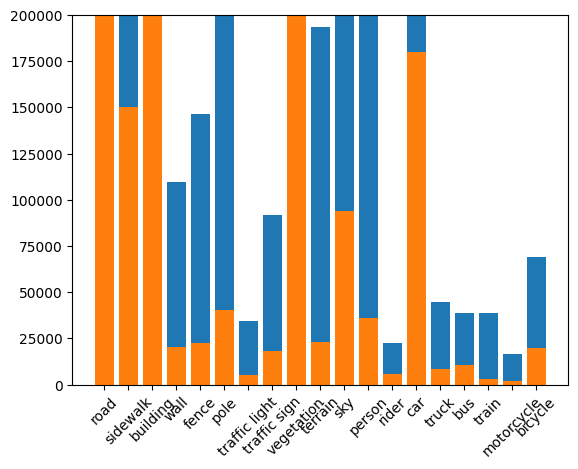

In [21]:
plt.ylim([0, 2e5])
plt.xticks(rotation=45)
plt.bar(eval_label_names, plot_counts);
plt.bar(eval_label_names, plot_counts_val);

In [134]:
import torch
import numpy as np
from torchmetrics import AUROC

# preds = torch.load('predictions_9.pth')
# labels = torch.tensor(np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/labels_val.npy', allow_pickle=True))
auc = AUROC(task="binary")
# auc(preds, labels)

In [7]:
preds.shape

torch.Size([6272000])

In [10]:
labels.shape[0] * 2

6272000

In [171]:
checkpoint_path = '/home/hkhachatrian/mae/checkpoints/road_patches_100000/epoch=299.ckpt'
# npy_embedings = '/mnt/lwll/lwll-coral/hrant/cs_patches_256/embeds_val.npy'
# npy_labels = '/mnt/lwll/lwll-coral/hrant/cs_patches_256/labels_val.npy'

In [172]:
from binary_classifier import Classifier, Model
import tqdm
from dataset import BinaryDataset
from torchmetrics.classification import BinaryF1Score

model = Model(1024, num_classes=1)

checkpoint = torch.load(checkpoint_path)
# msg = model.load_state_dict(checkpoint, strict=False)
model = Classifier.load_from_checkpoint(checkpoint_path, model=model)
model.to('cpu')
model.eval()
# embeds = torch.tensor(np.load(npy_embedings, allow_pickle=True))
# labels = torch.tensor(np.load(npy_labels, allow_pickle=True))

# predictions = []
# gt_labels = []
# print('starting predictions')
# for embed in embeds:
#     preds = model(embed.to('cuda'))
#     predictions.append(preds.to('cpu').detach())
    # gt_labels.append(gt_label.to('cpu').detach())

ModelCheckpoint(save_last=True, save_top_k=-1, monitor=None) will duplicate the last checkpoint saved.


Classifier(
  (model): Model(
    (linear): Linear(in_features=1024, out_features=2, bias=True)
    (activation): Softmax(dim=-1)
  )
  (criterion): CrossEntropyLoss()
)

In [173]:
from tqdm import tqdm
predictions = []
gt_labels = []
print('starting predictions')
# embeds_val = torch.tensor(embeds_val)
for embed in tqdm(embeds_val, total = len(embeds_val)):
    preds = model.model(embed)
    predictions.append(preds.detach())

starting predictions


100%|███████████████████████████████████| 3136000/3136000 [02:25<00:00, 21487.22it/s]


In [174]:
predictions_binary = [x.argmax().detach().numpy().item() for x in predictions]

In [175]:
labels_val = np.load('/mnt/lwll/lwll-coral/hrant/cs_patches_256/labels.npy', allow_pickle=True)

In [176]:
labels_val[labels_val!=7] = 0

In [177]:
labels_val[labels_val==7] = 1

In [178]:
np.unique(labels_val, return_counts=True)

(array([0, 1], dtype=uint8), array([12548158,  6111042]))

In [179]:
len(predictions_binary)

3136000

In [180]:
auc(torch.tensor(predictions_binary), torch.tensor(labels_val))

tensor(0.8322)

In [132]:
results = {'100_7': 0.7987, '1000_7':0.8154, '10000_7':0.8329, '100000_7':0.8322,
           '100_11':0.6430, '1000_11':0.6587, '10000_11': 0.6694,
           '100_8':0.5727, '100_8':0.6258, '1000_8':0.6625,
           '10000_8':0.6599, }